<a href="https://colab.research.google.com/github/hadareanalex/pydata-book/blob/1st-edition/Referat-Final_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compararea performantelor in reconstructia unei imagini intre algoritmul DEAP si PYGAD

In [1]:
!pip install pygad

In [2]:
import numpy
import functools
import operator
import imageio
import pygad
import matplotlib.pyplot

# Transformarea unei imagini in vector

Primul lucru pe care trebuie sa il facem pentru a putea procesa o imagine este sa o transformam intr-un vector.
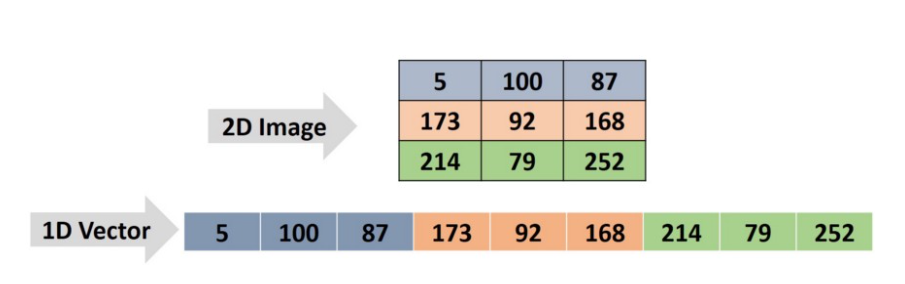

In [3]:
def image_to_array(img_arr):
    return numpy.reshape(a=img_arr, newshape=(functools.reduce(operator.mul, img_arr.shape)))

# Transformarea vectorului inapoi in imagine
  Procesarea vectorului pentru a genera imaginea finala

In [17]:
def array_to_image(vector, shape):
    # Check if the vector can be reshaped according to the specified shape.
    if len(vector) != functools.reduce(operator.mul, shape):
        raise ValueError("A vector of length {vector_length} into an array of shape {shape}.".format(vector_length=len(vector), shape=shape))

    return numpy.reshape(a=vector, newshape=shape)

Algoritmul genetic începe cu o populație inițială, care este un grup de soluții la problema dată. Aceste soluții sunt generate aleatoriu iar lungimea vectorului este egală cu numărul de elemente din vectorul imagini initiale.

In [7]:

# Reading target image to be reproduced using Genetic Algorithm (GA).
target_im = imageio.imread('mona-lisa.jpg')
target_im = numpy.asarray(target_im/255, dtype=numpy.float)

# Target image after enconding. Value encoding is used.
target_chromosome = image_to_array(target_im)


# Functia fitness

Algoritmul genetic(AG) începe cu o serie de soluții proaste care sunt generate aleatoriu. GA se bazează pe ideea că evoluția soluțiilor proaste ar putea aduce soluții mai bune. Pentru fiecare generație, AG selectează cele mai bune soluții din populația actuală și le dezvoltă, sperând să returneze soluții mai bune.

Cum filtrează GA soluțiile pentru a returna cele mai bune dintre ele? Acest lucru se face folosind o funcție de fitness. Fiecare cromozom este aplicat acestei funcții și se returnează un număr. Cu cât este mai mare numărul, cu atât este mai bună soluția. Aceasta este cunoscută sub numele de funcție de maximizare.

Acceptă 2 argumente - imaginea țintă și soluția curentă - și returnează un număr pentru a măsura similitudinea dintre ele


In [8]:

def fitness_fun(solution, solution_idx):
    fitness = numpy.sum(numpy.abs(target_chromosome-solution))

    # Negating the fitness value to make it increasing rather than decreasing.
    fitness = numpy.sum(target_chromosome) - fitness
    return fitness

# Functia callback
- salvarea de imagini o data la 2000 de generati
- numarul generatiei
- fitnesul generatiei respective

In [9]:

def callback(ga_instance):
    print("Generation = {gen}".format(gen=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

    if ga_instance.generations_completed % 2000 == 0:
        matplotlib.pyplot.imsave('solution_'+str(ga_instance.generations_completed)+'.png', chromosome2img(ga_instance.best_solution()[0], target_im.shape))


# Algoritmul PYGAD 
Principali parametri ai acestui algoritm sunt:
 - numarul de generati: 66000
 - tipul de mutatie : random in cazul nostru. Operația de mutație selectează unele gene din cromozomi și apoi le modifică în mod aleatoriu valorile
 - functia callback: este reapelata pentru fiecare generatie

In [10]:
ga_instance = pygad.GA(num_generations=66000,
                       num_parents_mating=10,
                       fitness_func=fitness_fun,
                       sol_per_pop=20,
                       num_genes=target_im.size,
                       init_range_low=0.0,
                       init_range_high=1.0,
                       mutation_percent_genes=0.01,
                       mutation_type="random",
                       mutation_by_replacement=True,
                       random_mutation_min_val=0.0,
                       random_mutation_max_val=1.0,
                       callback_generation=callback)

/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:617: UserWarning: Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.
  if not self.suppress_warnings: warnings.warn("Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.")


# rulare

In [11]:
ga_instance.run()

Streaming output truncated to the last 5000 lines.
Fitness    = 35497.09998936317
Generation = 64333
Fitness    = 35497.09998936317
Generation = 64334
Fitness    = 35497.09998936317
Generation = 64335
Fitness    = 35497.09998936317
Generation = 64336
Fitness    = 35497.226578541595
Generation = 64337
Fitness    = 35497.226578541595
Generation = 64338
Fitness    = 35497.226578541595
Generation = 64339
Fitness    = 35497.226578541595
Generation = 64340
Fitness    = 35497.226578541595
Generation = 64341
Fitness    = 35497.226578541595
Generation = 64342
Fitness    = 35497.226578541595
Generation = 64343
Fitness    = 35497.447026374444
Generation = 64344
Fitness    = 35497.447026374444
Generation = 64345
Fitness    = 35497.447026374444
Generation = 64346
Fitness    = 35497.447026374444
Generation = 64347
Fitness    = 35497.67220412681
Generation = 64348
Fitness    = 35497.8716508028
Generation = 64349
Fitness    = 35497.8716508028
Generation = 64350
Fitness    = 35497.8716508028
Generation

KeyboardInterrupt: ignored

2021-03-24--19-50-27

```
# This is formatted as code
```



In [12]:
from datetime import datetime
now = datetime.now()

startTime = now.strftime("%Y-%m-%d--%H-%M-%S")
print("run started at:", startTime)

run started at: 2021-03-24--21-52-14


# Grafice

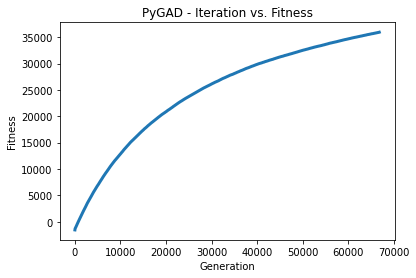

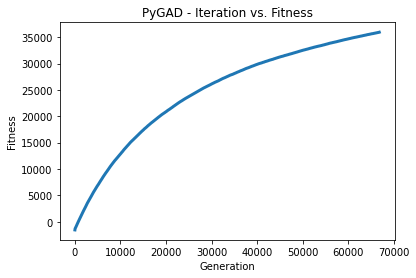

In [13]:
ga_instance.plot_result()

In [14]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

Fitness value of the best solution = 35939.65593715552
Index of the best solution : 0


In [15]:
if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))


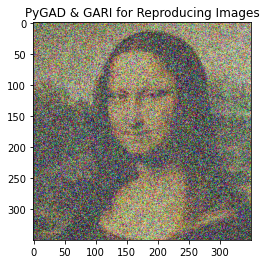

In [18]:
result = array_to_image(solution, target_im.shape)
matplotlib.pyplot.imshow(result)
matplotlib.pyplot.title("PyGAD & GARI for Reproducing Images")
matplotlib.pyplot.show()

# Diferente intre algoritmi DEAP si PYGAD
 Numarul de epoci:
 - DEAP ->1.000
 - PYGAD ->66.000

Timpul de rulare:
 - DEAP -> ~ 2.5 h
 - PYGAD -> ~ 2 h

Rezultatul final:
  - DEAP: 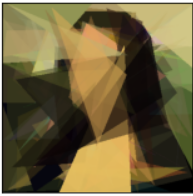
  - PYGAD: 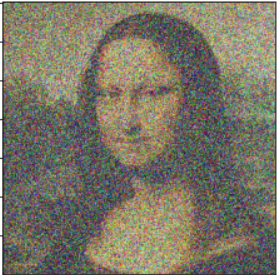

Dimensiune imagine:
  - DEAP: 25x25
  - PYGAD: 300x300

# Concluzii 
- Dupa cum se poate observa algoritmul PYGAD in rezolvarea acestei probleme a obtinut rezultate mai bune decat algoritmul DEAL, raportat la timpul mai scurt de executie, la numarul mult mai mare de generati si la dimensiunea pozei la pe care sa facut procesarea aceasta diferenta find una semnificativ mai mare.

- Un mare avantaj la PYGAD este acela ca alege numarul de elipse egal nu numarul de elemente din cadrul vectorului imagini initiale, astfel ne find nevoie de o redimensionare a elipselor, find nevoie de schimbarea doar a catorva dintre parametri acestora cum ar fi rearanjarea si de schimbarea culori, pentru a putea fi reconstruita imabinea initiala

- Totodata se poate observa si diferenta mare dintre rezultate

- In cazul algoritmului DEAP se poate imbunatati performanta rulari si calitatea imagini rezultate prin schimbarea numarului de poligoane si dimensiunea acestora 

# Referinte
- https://www.jmlr.org/papers/volume13/fortin12a/fortin12a.pdf

- [Book] “Ahmed Fawzy Gad ‘Practical Computer Vision Applications Using Deep Learning with CNNs’. Dec. 2018, Apress, 978–1–4842–4167–7 “ (https://link.springer.com/book/10.1007%2F978-1-4842-4167-7).

- https://www.linkedin.com/pulse/genetic-algorithm-implementation-python-ahmed-gad

- https://pygad.readthedocs.io/en/latest/
